In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 1. DATA LOADING & EXPLORATION
print("Loading Dataset...")
df = pd.read_csv('Mall_Customers.csv')
print(f"Dataset shape: {df.shape}")
print(df.head())
print(df.info())
print(df.describe())

Loading Dataset...
Dataset shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       C

In [5]:
# 2. SELECT FEATURES FOR CLUSTERING
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()
print(f"\nSelected features: {features}")


Selected features: ['Annual Income (k$)', 'Spending Score (1-100)']


In [6]:
# 3. FEATURE SCALING (MANDATORY for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled using StandardScaler")


✅ Features scaled using StandardScaler


In [7]:
# 4. ELBOW METHOD - Find Optimal K
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

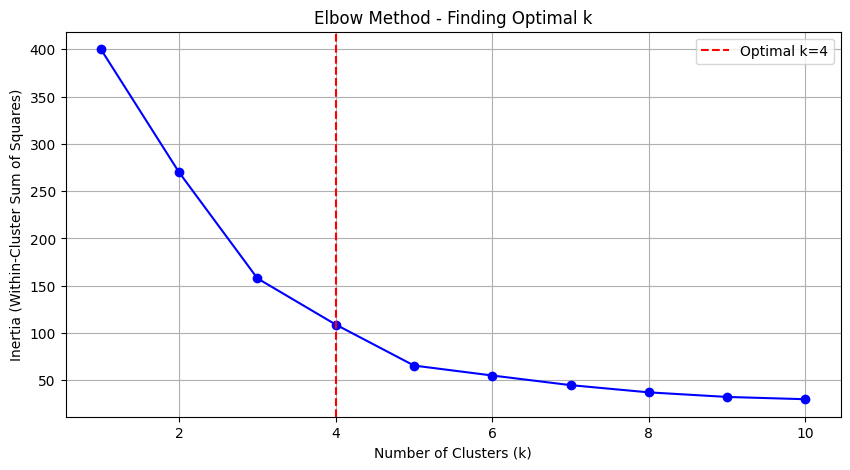

In [8]:
# Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method - Finding Optimal k')
plt.grid(True)
plt.axvline(x=4, color='red', linestyle='--', label='Optimal k=4')
plt.legend()
plt.show()

In [9]:
# 5. FINAL K-MEANS WITH OPTIMAL K=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"\n✅ K-Means clustering completed with k={optimal_k}")
print("Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())



✅ K-Means clustering completed with k=4
Cluster distribution:
Cluster
0     23
1     38
2    100
3     39
Name: count, dtype: int64


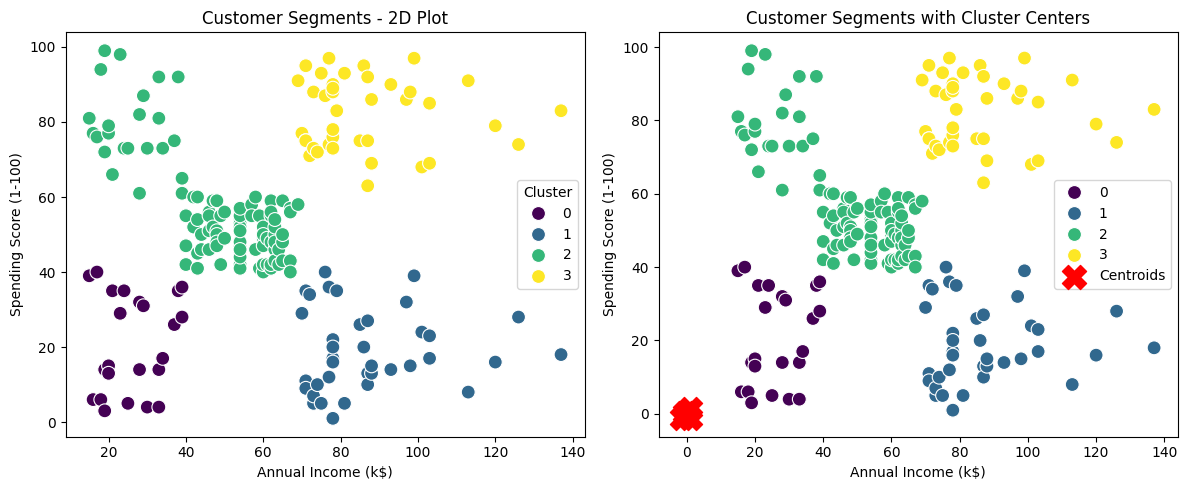

In [10]:
# 6. 2D VISUALIZATION
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=features[0], y=features[1], hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments - 2D Plot')
plt.xlabel(features[0])
plt.ylabel(features[1])

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                palette='viridis', s=100)
plt.title('Customer Segments with Cluster Centers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', s=300, marker='X', label='Centroids')
plt.legend()
plt.xlabel(features[0])
plt.ylabel(features[1])

plt.tight_layout()
plt.show()

Creating 2D PCA visualization...


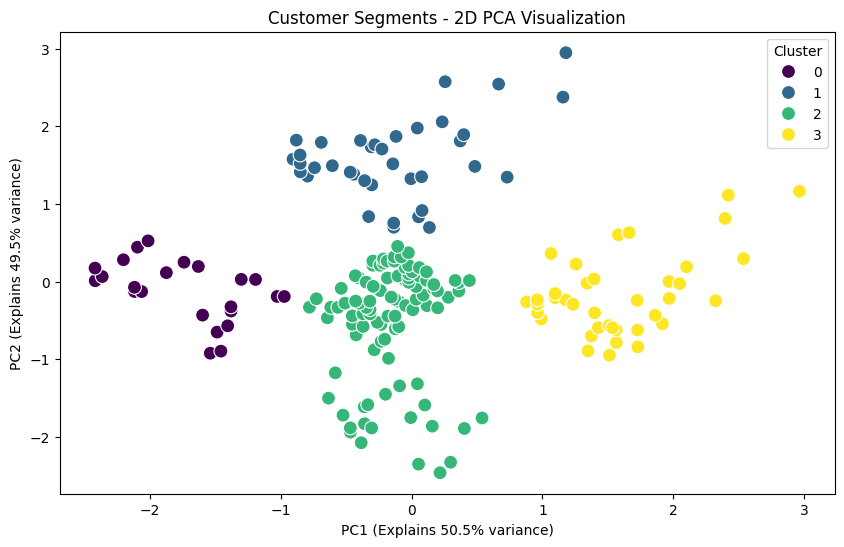

✅ All visualizations complete!


In [12]:
# 7. 2D PCA VISUALIZATION (Better for 2 features)
print("Creating 2D PCA visualization...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments - 2D PCA Visualization')
plt.xlabel(f'PC1 (Explains {pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 (Explains {pca.explained_variance_ratio_[1]:.1%} variance)')
plt.show()

print("✅ All visualizations complete!")

In [13]:
# 8. CLUSTER PROFILES & INTERPRETATION
print("\n📋 CLUSTER PROFILES:")
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary.round(2))


📋 CLUSTER PROFILES:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     26.30                   20.91
1                     87.00                   18.63
2                     48.26                   56.48
3                     86.54                   82.13


In [14]:
# Manual interpretation
print("\n🔍 Cluster Insights:")
print("Cluster 0: Low Income, Low Spending (Conservative)")
print("Cluster 1: High Income, Low Spending (Conservative Elite)")
print("Cluster 2: Low Income, High Spending (Targeted Promoters)")
print("Cluster 3: High Income, High Spending (Ideal Customers)")


🔍 Cluster Insights:
Cluster 0: Low Income, Low Spending (Conservative)
Cluster 1: High Income, Low Spending (Conservative Elite)
Cluster 2: Low Income, High Spending (Targeted Promoters)
Cluster 3: High Income, High Spending (Ideal Customers)


In [15]:
# 9. SAVE RESULTS
df.to_csv('customer_segments_results.csv', index=False)
print("\n💾 Results saved to 'customer_segments_results.csv'")

print("\n Customer Segmentation Complete!")


💾 Results saved to 'customer_segments_results.csv'

 Customer Segmentation Complete!
